In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the Data
data = pd.read_csv("HW4_prob2.csv")
print(f"Shape of data['U1']: {data['U1'].shape}")
x_data = torch.tensor(data["U1"].values, dtype=torch.float32).unsqueeze(1)
print(f"Shape of x_data: {x_data.shape}")
# print(x_data)
print(f"Shape of data['U2']: {data['U2'].shape}")
y_data = torch.tensor(data["U2"].values, dtype=torch.float32).unsqueeze(1)
print(f"Shape of y_data: {y_data.shape}")
# print(y_data)
given_data = torch.cat((x_data, y_data), dim=1)

Shape of data['U1']: (50,)
Shape of x_data: torch.Size([50, 1])
Shape of data['U2']: (50,)
Shape of y_data: torch.Size([50, 1])


In [2]:
# Assuming CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# If CUDA is available, move the model to GPU
print("torch.cuda.is_available(): ",torch.cuda.is_available())

torch.cuda.is_available():  True


Layer (type:depth-idx)                   Param #
Model                                    --
├─Linear: 1-1                            32
├─Linear: 1-2                            272
├─Linear: 1-3                            17
Total params: 321
Trainable params: 321
Non-trainable params: 0
Epoch [100/1000], Loss: 0.0000
Epoch [200/1000], Loss: 0.0000
Epoch [300/1000], Loss: 0.0002
Epoch [400/1000], Loss: 0.0001
Epoch [500/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0001


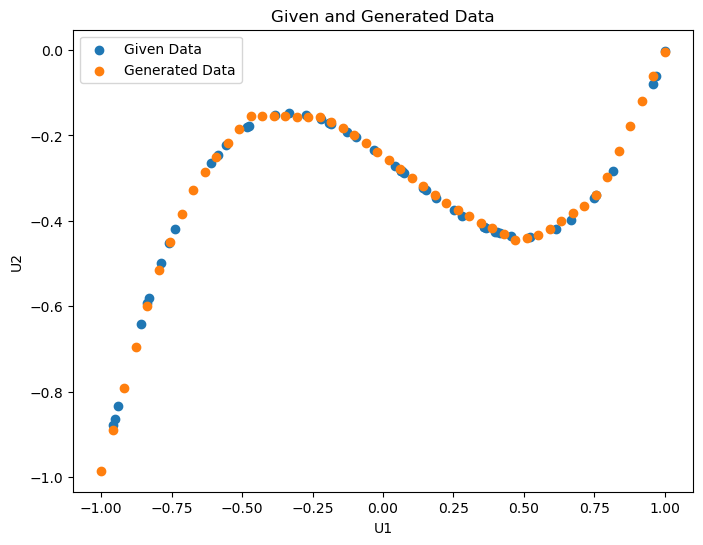

In [5]:
# Step 2: Define the Model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 3: Prepare the Data
dataset = TensorDataset(x_data, y_data)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Step 4: Define Loss Function and Optimizer
model = Model()
model = model.to(device)

import torchinfo
print(torchinfo.summary(model))

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 5: Training Loop
num_epochs = 1000
for epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        generated_y = model(batch_x)
        loss = criterion(generated_y, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Step 6: Generate New Data
with torch.no_grad():
    #創建了一個從 -1 到 1 的等間距序列，包含了50個值。這些值將被用作生成新資料的輸入。
    new_x = torch.linspace(-1, 1, 50).unsqueeze(1)
    new_x=new_x.to(device)
    new_y = model(new_x)

generated_data = torch.cat((new_x, new_y), dim=1)
generated_data=generated_data.cpu()

# Step 7: Visualize
plt.figure(figsize=(8, 6))
plt.scatter(given_data[:, 0], given_data[:, 1], label='Given Data')
plt.scatter(generated_data[:, 0], generated_data[:, 1], label='Generated Data')
plt.xlabel('U1')
plt.ylabel('U2')
plt.title('Given and Generated Data')
plt.legend()
plt.show()
